# Module 3: User Defined Functions and Data Visualizations

In [45]:
import pandas as pd
import glob,os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)


### ```Part I: Creating Functions```

Sometimes it will be helpful for us to write our own functions - a more custom approach if an external library function will not suffice.

**Reference:** Pg 41 "Defining and Using Functions"

Watch Hugo's UDF: https://www.youtube.com/watch?v=d_Oa6oH1l6c

In [47]:
sum([7,3]) #function in the standard library

10

In [46]:
np.sum([7,3])

10

In [43]:
#notice here that we only use python syntax (no library functions)
def add_two_numbers(x,y):
    
    result = x + y
    
    return result

**More examples to follow...**

### ```Part II: Visualizing Data```

Seaborn Sample Gallery (official site) : https://seaborn.pydata.org/examples/index.html

In [6]:
titanic = pd.read_csv(r"C:\Users\jeffw_000\Dropbox\Python Bridge Course\Sample Data Sets\titanic.csv")

In [7]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


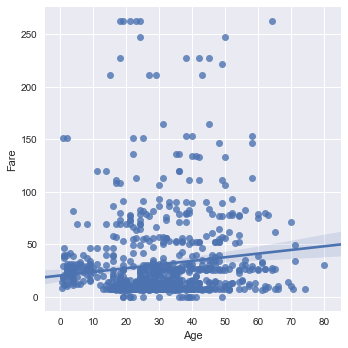

In [8]:
​sns.lmplot(x='Age', y='Fare', data=titanic[titanic['Fare'] < 300])

## Dataset #1:  ``Super Heros``

In [13]:
os.chdir(r'C:\Users\jeffw_000\Dropbox\Python Bridge Course\Sample Data Sets')

In [14]:
hero = pd.read_csv('super_hero_powers.csv')

In [15]:
len(hero)

667

In [16]:
powers = hero.columns[1:]

In [17]:
hero['TotalPowers'] = hero[powers].sum(axis = 1)

In [18]:
hero_power_stats = hero[['hero_names','TotalPowers']]

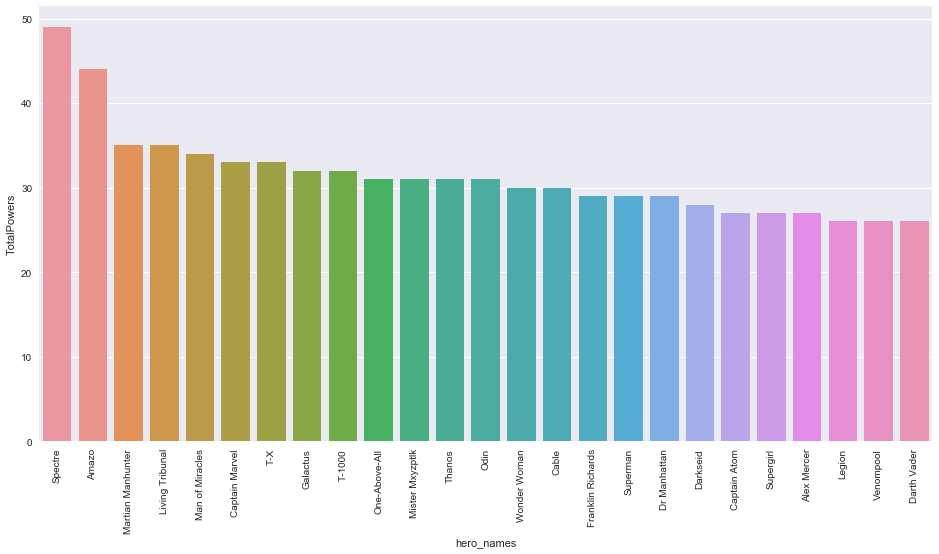

In [19]:
# Count Plot (a.k.a. Bar Plot)
fig, ax = plt.subplots()
fig.set_size_inches(16, 8.0)
plot = sns.barplot(x='hero_names',y = 'TotalPowers',data = hero_power_stats.sort_values(by = 'TotalPowers',ascending = False)[:25])
#g.set_xticklabels(rotation = 90)
for item in plot.get_xticklabels():
    item.set_rotation(90)


### ``Functions`` to find Super Powers 

In [20]:
def list_powers(superhero):
    data = hero[hero['hero_names'] == superhero]
    
    powers = []    
    for c in data.columns[1:-1]:
        if (data[c].values == True):
            powers.append(c)
        else:
            continue
    #print(powers)
    return powers
      
def difference_in_powers(hero1,hero2):
    result = set(list_powers(hero1)) - set(list_powers(hero2))
    return result

def find_heros(string):
    df = hero[hero['hero_names'].apply(lambda x: x.startswith(string))]
    return df
    

In [21]:
difference_in_powers('Donatello','Leonardo')

set()

In [22]:
find_heros('Don')

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,TotalPowers
204,Donatello,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,9
205,Donna Troy,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,3


## Dataset #2: Apple Data 

In [23]:
import os


In [24]:
os.chdir(r'C:\Users\jeffw_000\Dropbox\Python Bridge Course\Sample Data Sets')

In [25]:
aapl = pd.read_csv(r'AAPL_20Years.csv')

In [26]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-07-08,1.098214,1.176339,1.095982,1.162946,0.784240,233203600
1,1998-07-09,1.176339,1.200893,1.122768,1.131696,0.763167,141652000
2,1998-07-10,1.149554,1.165179,1.133929,1.145089,0.772198,75630800
3,1998-07-13,1.140625,1.218750,1.138393,1.212054,0.817356,178847200
4,1998-07-14,1.212054,1.214286,1.183036,1.194196,0.805314,137132800


In [27]:
aapl['cum_sum'] = aapl['Adj Close'].cumsum()
aapl['cum_perc'] = 100*aapl.cum_sum/aapl['Adj Close'].sum()

In [28]:
aapl['Return'] = aapl['Adj Close'].pct_change()

In [29]:
aapl_ts = aapl.set_index('Date')

In [30]:
aapl_slice = aapl[3900:4150]

In [31]:
aapl_slice_ts = aapl_slice.set_index('Date')

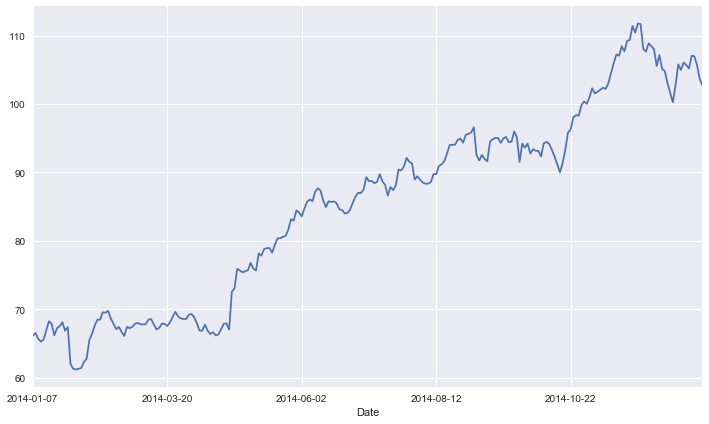

In [32]:
aapl_slice_ts['Adj Close'].plot(figsize = (12,7))

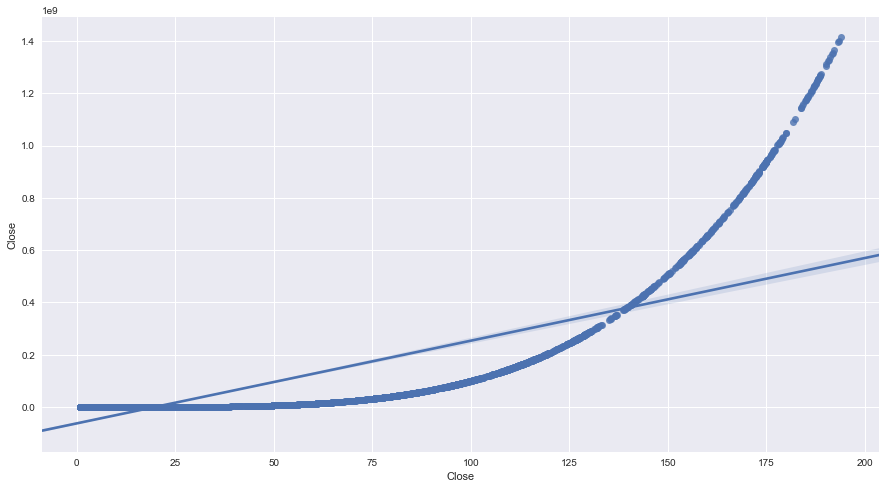

In [33]:
plt.figure(figsize = (15,8))
sns.regplot(aapl_ts['Close'],aapl_ts['Close']**4)

In [34]:
aapl_ts.head()

,Open,High,Low,Close,Adj Close,Volume,cum_sum,cum_perc,Return
Date,,,,,,,,,
1998-07-08,1.098214,1.176339,1.095982,1.162946,0.784240,233203600,0.784240,0.000406,NaN
1998-07-09,1.176339,1.200893,1.122768,1.131696,0.763167,141652000,1.547407,0.000800,-0.026871
1998-07-10,1.149554,1.165179,1.133929,1.145089,0.772198,75630800,2.319605,0.001199,0.011834
1998-07-13,1.140625,1.218750,1.138393,1.212054,0.817356,178847200,3.136961,0.001622,0.058480
1998-07-14,1.212054,1.214286,1.183036,1.194196,0.805314,137132800,3.942275,0.002038,-0.014733


## Dataset #3: Titanic 

In [35]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


C:\Users\jeffw_000\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


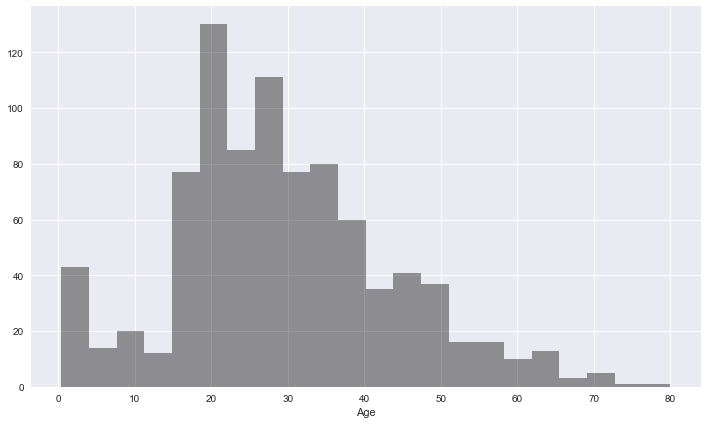

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7.0)
sns.distplot(titanic.Age,kde = False,color = 'black');


C:\Users\jeffw_000\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


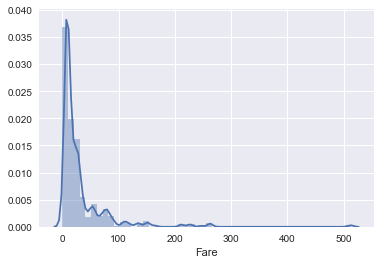

In [37]:
sns.distplot(titanic.Fare)